<a href="https://colab.research.google.com/github/m1dhun03/IMDB_Case_Study/blob/main/IMDB_Case_Study_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [8]:
movies = pd.read_csv('IMDB_Movies.csv')


In [9]:
movies.shape
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
a1=len(movies.index)
a1

5043

-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [11]:
# Write your code for inspection here
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [12]:
# Write your code for column-wise null count here
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [13]:
# Write your code for row-wise null count here
a=round((movies.isnull().sum()/len(movies.index))*100,2)
a

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.40
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [14]:
# Write your code for column-wise null percentages here
a=round((movies.isnull().sum()/len(movies.index))*100,2)
a

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.40
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [15]:
movies=movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name',
 'duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [16]:
# Write your code for dropping the rows here
movies=movies[~np.isnan(movies['gross'])]
#again caculating the percentage 
a=round((movies.isnull().sum()/len(movies.index))*100,2)
a

#removing rows for budget
movies=movies[~np.isnan(movies['budget'])]
#again caculating the percentage 
a=round((movies.isnull().sum()/len(movies.index))*100,2)
a

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [17]:
movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
# checking the percantage again
round((movies.isnull().sum()/len(movies.index))*100,2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [18]:
# Write your code for checking number of retained rows here
# this will tell the length 

(len(movies.index)/a1)*100

77.15645449137418

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [19]:
# Write your code for unit conversion her
movies['gross'] = movies['gross']/1000000
movies['budget'] = movies['budget']/1000000
movies


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [20]:
# Write your code for creating the profit column here
movies['profit']=movies.gross - movies.budget

In [21]:
# Write your code for sorting the dataframe here
movies=movies.sort_values(by='profit',ascending=False)

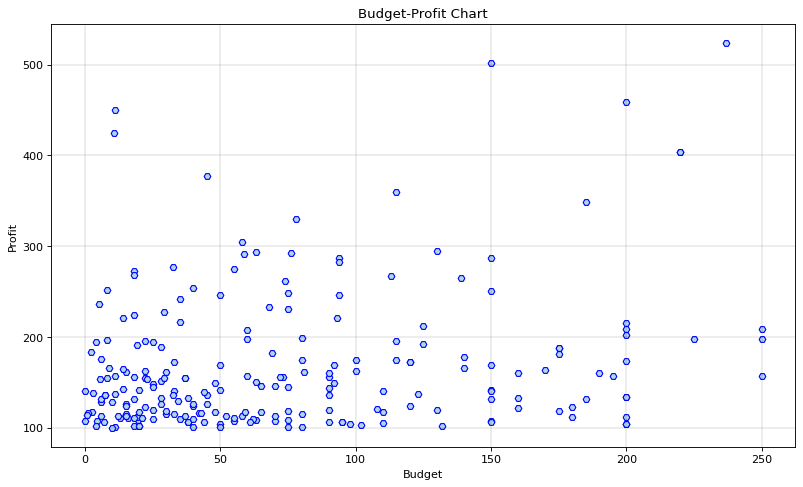

In [45]:
# Write code for profit vs budget plot here
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(num=None, figsize=(12,7), dpi=80)   
movies=movies[movies.profit>100]
plt.scatter(movies['budget'], movies['profit'],marker ="H",edgecolors = 'b',facecolor='lightblue') #Marker= hexagon, Edgecolor=Blue, fillcolor=lightblue
plt.xlabel("Budget") #Labelling x
plt.ylabel("Profit") #Labelling y
plt.title("Budget-Profit Chart")
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)  ##adds major gridlines
plt.show()

In [24]:
# Write your code to get the top 10 profiting movies here
top100 =pd.DataFrame(movies.sort_values(by='profit',ascending=False))

top10=pd.DataFrame(top100.head(10))
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [27]:
# Write your code for dropping duplicate values here
""" inplace true means in this same dataframeonly ihave changed and removed duplicate"""
top10.drop_duplicates('director_name',inplace=True)

In [28]:
# Write code for repeating subtask 2 here
top10=top10.sort_values(by='profit',ascending=False)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [29]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250=pd.DataFrame(movies[movies.num_voted_users>25000].sort_values(by='imdb_score',ascending=False).head(250))
#calculatinglength
len(IMDb_Top_250.index)

#[k for k in IMDb_Top_250.indes]
#IMDb_Top_250.apply(lambda x.count():x+1)

IMDb_Top_250['rank'] = range(0, len(IMDb_Top_250.index))
IMDb_Top_250


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,rank
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.0,1994.0,9.3,108000,3.341469,0
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952,1
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061,2
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.0,1974.0,9.0,14000,44.300000,3
1874,Steven Spielberg,174.0,96.067179,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273,English,22.0,1993.0,8.9,41000,74.067179,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Yimou Zhang,283.0,0.084961,Action|Adventure|History,Jet Li,Hero,149414,841,Mandarin,31.0,2002.0,7.9,0,-30.915039,245
1748,F. Gary Gray,349.0,161.029270,Biography|Crime|Drama|History|Music,Aldis Hodge,Straight Outta Compton,119928,331,English,28.0,2015.0,7.9,76000,133.029270,246
788,Cameron Crowe,149.0,32.522352,Adventure|Comedy|Drama|Music,Philip Seymour Hoffman,Almost Famous,207287,822,English,60.0,2000.0,7.9,15000,-27.477648,247
639,Michael Mann,209.0,28.965197,Biography|Drama|Thriller,Al Pacino,The Insider,133526,521,English,68.0,1999.0,7.9,0,-39.034803,248


In [30]:
 # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film=pd.DataFrame(IMDb_Top_250.loc[IMDb_Top_250['language']!='English',:])
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,rank
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000,5
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397,14
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939,17
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114,22
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657,31
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402,42
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710,46
1298,Jean-Pierre Jeunet,242.0,33.201661,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314,French,77.000000,2001.0,8.4,39000,-43.798339,49
2970,Wolfgang Petersen,96.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,14.000000,1981.0,8.4,11000,-2.566866,53
4659,Asghar Farhadi,354.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.500000,2011.0,8.4,48000,6.598492,55


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [31]:
# Write your code for extracting the top 10 directors here
b11=movies.groupby(by='director_name').mean().copy()
top10director=b11.sort_values(by='imdb_score',ascending=False)
top10director=pd.DataFrame(top10director.head(10))
top10director

,num_critic_for_reviews,gross,num_voted_users,budget,title_year,imdb_score,movie_facebook_likes,profit
director_name,,,,,,,,
Charles Chaplin,120.00,0.163245,1.430860e+05,1.500000,1936.000000,8.600000,0.000000,-1.336755
Tony Kaye,162.00,6.712241,7.824370e+05,7.500000,1998.000000,8.600000,35000.000000,-0.787759
Damien Chazelle,535.00,13.092000,3.991380e+05,3.300000,2014.000000,8.500000,129000.000000,9.792000
Ron Fricke,115.00,2.601847,2.245700e+04,4.000000,2011.000000,8.500000,26000.000000,-1.398153
Alfred Hitchcock,290.00,32.000000,4.224320e+05,0.806947,1960.000000,8.500000,18000.000000,31.193053
Majid Majidi,46.00,0.925402,2.788200e+04,0.180000,1997.000000,8.500000,0.000000,0.745402
Sergio Leone,138.00,4.966667,2.906917e+05,10.466667,1971.333333,8.433333,10666.666667,-5.500000
Christopher Nolan,511.25,226.653447,1.013285e+06,125.625000,2007.125000,8.425000,103625.000000,101.028447
Marius A. Markevicius,26.00,0.133778,3.086000e+03,0.500000,2012.000000,8.400000,0.000000,-0.366222


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [32]:
# Write your code for extracting the first two genres of each movie here
movies6=movies.copy()
cc=movies6.genres.str.split('|',n=3,expand=True)
movies6['genre1']=cc[0]
movies6['genre2']=cc[1]
movies6['genre3']=cc[2]

In [33]:
# Write your code for grouping the dataframe here
movies6=movies6.drop('genre3',axis=1)

In [34]:
# Write your code for getting the 5 most popular combo of genres here
movies6.loc[movies6.genre2.isnull(),'genre2']=movies6.genre1
movies6

#PopGenre = # Write your code for getting the 5 most popular combo of genres here
movies6.groupby(['genre1','genre2']).gross.mean()
PopGenre=pd.DataFrame(movies6.groupby(['genre1','genre2']).gross.mean())
PopGenre=PopGenre.sort_values(by='gross',ascending=False)
PopGenre

gross
genre1    genre2               
Family    Sci-Fi     434.949459
Adventure Sci-Fi     228.627758
          Animation  116.998550
          Family     116.520833
Action    Adventure  110.382547
...                         ...
Horror    Musical      0.140244
Romance   Romance      0.102850
Thriller  Thriller     0.040513
Sci-Fi    Sci-Fi       0.018195
Adventure War          0.014873

[103 rows x 1 columns]

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [35]:
# Write your code for creating three new dataframes here

Meryl_Streep=pd.DataFrame(movies.loc[movies['actor_1_name']=='Meryl Streep',:])
# Include all movies in which Meryl_Streep is the lead

In [36]:
Leo_Caprio=pd.DataFrame(movies.loc[movies['actor_1_name']=='Leonardo DiCaprio',:])
# Include all movies in which Leo_Caprio is the lead

In [37]:
Brad_Pitt=pd.DataFrame(movies.loc[movies['actor_1_name']=='Brad Pitt',:])
# Include all movies in which Brad_Pitt is the lead

In [38]:
# Write your code for combining the three dataframes here
Meryl_Streep.append(Leo_Caprio,ignore_index=True)
Brad_Pitt=Brad_Pitt.append(Meryl_Streep,ignore_index=True)


In [39]:
# Write your code for grouping the combined dataframe here
combined=Brad_Pitt.append(Leo_Caprio,ignore_index=True)
combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,Steven Soderbergh,186.0,183.405771,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845,English,85.0,2001.0,7.8,0,98.405771
1,Doug Liman,233.0,186.336103,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798,English,120.0,2005.0,6.5,0,66.336103
2,Neil Jordan,120.0,105.264608,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406,English,60.0,1994.0,7.6,11000,45.264608
3,David Ayer,406.0,85.707116,Action|Drama|War,Brad Pitt,Fury,303185,701,English,68.0,2014.0,7.6,82000,17.707116
4,Steven Soderbergh,198.0,125.531634,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627,English,110.0,2004.0,6.4,0,15.531634
5,Alejandro G. Iñárritu,285.0,34.300771,Drama,Brad Pitt,Babel,243799,908,English,25.0,2006.0,7.5,0,9.300771
6,Andrew Dominik,414.0,14.938570,Crime|Thriller,Brad Pitt,Killing Them Softly,111625,369,English,15.0,2012.0,6.2,20000,-0.061430
7,Tony Scott,122.0,12.281500,Action|Crime|Drama|Romance|Thriller,Brad Pitt,True Romance,163492,460,English,13.0,1993.0,8.0,15000,-0.718500
8,Angelina Jolie Pitt,131.0,0.531009,Drama|Romance,Brad Pitt,By the Sea,7976,61,English,10.0,2015.0,5.3,0,-9.468991
9,Terrence Malick,584.0,13.303319,Drama|Fantasy,Brad Pitt,The Tree of Life,136367,975,English,32.0,2011.0,6.7,39000,-18.696681


In [40]:
# Write the code for finding the mean of critic reviews and audience reviews here
combined.groupby(by='actor_1_name')['num_critic_for_reviews','num_user_for_reviews'].mean()

,num_critic_for_reviews
actor_1_name,
Brad Pitt,245.000000
Leonardo DiCaprio,330.190476
Meryl Streep,181.454545


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [41]:
# Write the code for calculating decade here
movies['decade']=movies['title_year'].apply(lambda x: (x//10) *10).astype(np.int64)  #astype(np.int64) to remove .0
movies['decade']=movies['decade'].astype(str)+'s'    #astype(str)+'s' to add s to decade
movies=movies.sort_values(['decade'])
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,decade
4958,Harry F. Millarde,1.0,3.000000,Crime|Drama,Stephen Carr,Over the Hill to the Poorhouse,5,1,English,0.100,1920.0,4.8,0,2.900000,1920s
2734,Fritz Lang,260.0,0.026435,Drama|Sci-Fi,Brigitte Helm,Metropolis,111841,413,German,6.000,1927.0,8.3,12000,-5.973565,1920s
4812,Harry Beaumont,36.0,2.808000,Musical|Romance,Anita Page,The Broadway Melody,4546,71,English,0.379,1929.0,6.3,167,2.429000,1920s
4157,Victor Fleming,213.0,22.202612,Adventure|Family|Fantasy|Musical,Margaret Hamilton,The Wizard of Oz,291875,533,English,2.800,1939.0,8.1,14000,19.402612,1930s
4706,Mark Sandrich,66.0,3.000000,Comedy|Musical|Romance,Ginger Rogers,Top Hat,13269,98,English,0.609,1935.0,7.8,1000,2.391000,1930s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,Anne Fontaine,141.0,0.317125,Drama|Romance,Robin Wright,Adore,23334,87,English,16.000,2013.0,6.2,0,-15.682875,2010s
752,Chris Butler,328.0,55.994557,Adventure|Animation|Comedy|Family|Fantasy,Anna Kendrick,ParaNorman,72287,176,English,60.000,2012.0,7.0,12000,-4.005443,2010s
3831,Nicolas Winding Refn,440.0,0.778565,Crime|Drama,Ryan Gosling,Only God Forgives,83234,475,English,4.800,2013.0,5.7,30000,-4.021435,2010s
2638,David Ayer,355.0,40.983001,Crime|Drama|Thriller,Jake Gyllenhaal,End of Watch,181025,336,English,7.000,2012.0,7.7,38000,33.983001,2010s


In [42]:
# Write your code for creating the data frame df_by_decade here 
df_by_decade=movies.groupby('decade')
df_by_decade['num_voted_users'].sum()
#Convert to Dafaframe
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1920s,116392
1930s,804839
1940s,230838
1950s,678336
1960s,2983442
1970s,8681959
1980s,20091781
1990s,70088770
2000s,173027465


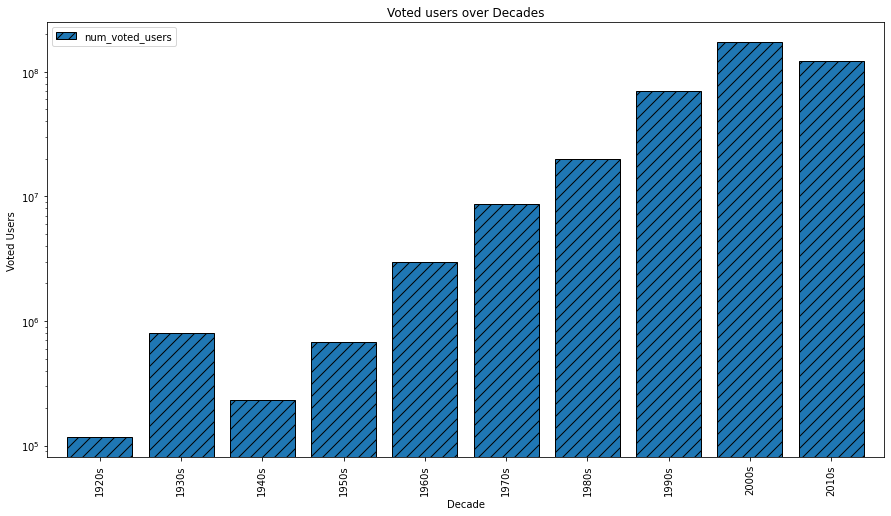

In [43]:
# Write your code for plotting number of voted users vs decade
import matplotlib.pyplot as plt

df_by_decade.plot.bar(figsize=(15,8),width=0.8,hatch="//",edgecolor='k')   #Figure size, width of bars, Pattern, edgecolor
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log')  #Changing y scale
plt.show()